In [56]:
import pandas as pd

In [57]:
df = pd.read_csv('/content/pinguinos.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Revisamos valores faltantes

In [58]:
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


Eliminamos las filas que el sexo sea un valor faltante

In [59]:
df.dropna(subset=['sex'],axis="index",inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Conversion de variables categoricas a numeros

In [60]:
df['species_id'] = df['species'].astype('category').cat.codes
df['island_id'] = df['island'].astype('category').cat.codes
df['sex_id'] = df['sex'].astype('category').cat.codes
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_id,island_id,sex_id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,2,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,2,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,2,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,2,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,2,2
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,2,0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2,0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,2,0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,2,0,1


Separamos el dataset en train y test

In [61]:
X = df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','island_id','sex_id']]
y = df["species_id"]

Normalizar

In [62]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667, 1.        ,
        1.        ],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556, 1.        ,
        0.5       ],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778, 1.        ,
        0.5       ],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222, 0.        ,
        1.        ],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444, 0.        ,
        0.5       ],
       [0.64727273, 0.35714286, 0.69491525, 0.75      , 0.        ,
        1.        ]])

In [63]:
X_df = pd.DataFrame(data=X, columns=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','island_id','sex_id'])
X_df['species'] = y
correlation_matrix = X_df.corr()

print(correlation_matrix)

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.228640           0.652126   
culmen_depth_mm           -0.228640         1.000000          -0.578730   
flipper_length_mm          0.652126        -0.578730           1.000000   
body_mass_g                0.589066        -0.472987           0.873211   
island_id                 -0.337009         0.568885          -0.555759   
sex_id                     0.338676         0.374034           0.241121   
species                    0.693171        -0.730723           0.843910   

                   body_mass_g  island_id    sex_id   species  
culmen_length_mm      0.589066  -0.337009  0.338676  0.693171  
culmen_depth_mm      -0.472987   0.568885  0.374034 -0.730723  
flipper_length_mm     0.873211  -0.555759  0.241121  0.843910  
body_mass_g           1.000000  -0.560518  0.411531  0.743770  
island_id            -0.560518   1.000000 -0.004147 -0.611225  
sex_id         

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [65]:
X_train.shape

(267, 6)

In [66]:
y_train.shape

(267,)

In [67]:
# Definir el modelo
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=0)
modelo_completo = tree.DecisionTreeClassifier(random_state=0)



In [68]:
modelo_completo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [69]:
y_pred = modelo_completo.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc=  accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", acc)
print("Precision:", pre)
print("Recall:", rec)
print("F1-score:", f1)

Accuracy: 0.9552238805970149
Precision: 0.9468390804597702
Recall: 0.960727969348659
F1-score: 0.9517907712810262


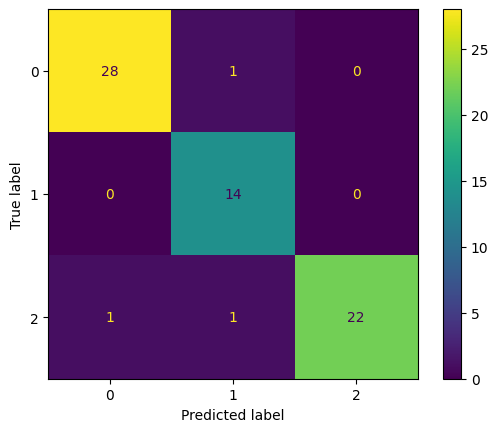

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Filtrando

In [72]:
X_train = pd.DataFrame(data=X_train, columns=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','island_id','sex_id'])
X_test = pd.DataFrame(data=X_test, columns=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','island_id','sex_id'])

In [73]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_id,sex_id
0,0.676364,0.785714,0.525424,0.375000,0.5,1.0
1,0.541818,0.500000,0.220339,0.277778,0.5,0.5
2,0.130909,0.583333,0.508475,0.236111,0.5,0.5
3,0.236364,0.488095,0.457627,0.291667,0.0,0.5
4,0.294545,0.476190,0.355932,0.194444,0.5,0.5
...,...,...,...,...,...,...
262,0.243636,0.488095,0.135593,0.305556,0.0,1.0
263,0.643636,0.500000,0.440678,0.270833,0.5,0.5
264,0.436364,0.785714,0.406780,0.472222,0.5,1.0
265,0.592727,0.380952,0.813559,0.750000,0.0,1.0


In [74]:
X_train[['culmen_length_mm','flipper_length_mm','body_mass_g']]

,culmen_length_mm,flipper_length_mm,body_mass_g
0,0.676364,0.525424,0.375000
1,0.541818,0.220339,0.277778
2,0.130909,0.508475,0.236111
3,0.236364,0.457627,0.291667
4,0.294545,0.355932,0.194444
...,...,...,...
262,0.243636,0.135593,0.305556
263,0.643636,0.440678,0.270833
264,0.436364,0.406780,0.472222
265,0.592727,0.813559,0.750000


In [75]:
model.fit(X_train[['culmen_length_mm','flipper_length_mm','body_mass_g']], y_train)

DecisionTreeClassifier(random_state=0)

In [76]:
y_pred = model.predict(X_test[['culmen_length_mm','flipper_length_mm','body_mass_g']])

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc=  accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", acc)
print("Precision:", pre)
print("Recall:", rec)
print("F1-score:", f1)

Accuracy: 0.9253731343283582
Precision: 0.9260752688172044
Recall: 0.9329501915708813
F1-score: 0.9252525252525253


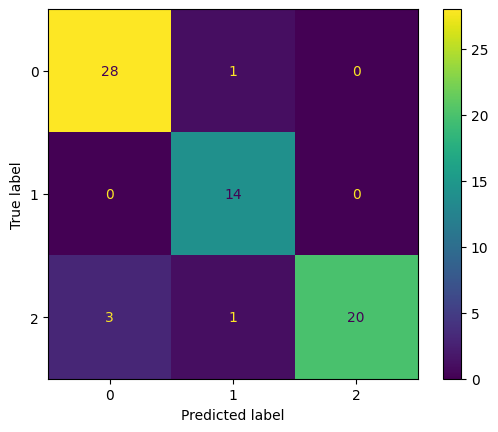

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()